In [22]:
%load_ext autoreload
%autoreload 2
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [23]:
import numpy as np
from dark_emulator_public import dark_emulator
import os, sys, time, json
import matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import simps
#from tqdm import tqdm
import hsc3x2pt

# パワースペクトルclass
中でdark emulator, halofitを動かしている。

In [24]:
power_b1 = hsc3x2pt.power_b1_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


# define source sample

In [25]:
samplename = 's1'
dzph1  = 0   # photoz bias
dm1    = 0   # multiplicative bias
A_IA   = 0   # intrinsic alignment
eta_IA = 0   # IA redshift dependence
sigma_e= 0.2 # shape noise
nsource= '4.75 arcmin^-2' # number density of source galaxy
fname_Nz = '/Users/taniguchitakanori/Desktop/XMMfield2/redshift_r000_rotmat1.dat'

g_s = hsc3x2pt.galaxy_sample_source_IA_class([samplename, fname_Nz, dzph1, dm1, A_IA, eta_IA, sigma_e, nsource])

# C(l) class
powerをclに変換すすclass。

In [26]:
pk2cl = hsc3x2pt.pk2cl_class(power_b1)

In [27]:
# source sampleをセットする
pk2cl.set_galaxy_sample(g_s)

In [28]:
# 宇宙論parameterを与える。dark emulatorへのinput
cosmo_dict = dict(zip(['omega_b', 'omega_c', 'Omega_de', 'ln10p10As', 'n_s', 'w_de'], 
                      [0.046*0.7*0.7, 0.233*0.7*0.7, 0.721, 3.114931326464135, 0.97, -1]))
pk2cl.set_cosmology_from_dict(cosmo_dict)

In [29]:
#与えた宇宙論parameterで、power spectrumを計算する。
pk2cl.init_pk()

In [30]:
# lを定義
l = np.logspace(-2, 5, 1000)

In [31]:
# C(l)を計算。
with hsc3x2pt.Time():
    pk2cl.compute_all_Cl(l)

:4.936444282531738 sec


In [11]:
# save C(l)
#dirname_to_save = 'test'
#pk2cl.dump_Cl_cache(dirname_to_save, overwrite=True, silent=True)

In [32]:
pk2cl.Cl_cache['Cl'].keys()

odict_keys(['l', 's1,s1'])

In [33]:
pk2cl.Cl_cache

OrderedDict([('condition', 'nonlin'),
             ('Cl',
              OrderedDict([('l',
                            array([1.00000000e-02, 1.01626509e-02, 1.03279473e-02, 1.04959323e-02,
                                   1.06666496e-02, 1.08401436e-02, 1.10164595e-02, 1.11956432e-02,
                                   1.13777413e-02, 1.15628013e-02, 1.17508713e-02, 1.19420003e-02,
                                   1.21362380e-02, 1.23336350e-02, 1.25342427e-02, 1.27381132e-02,
                                   1.29452998e-02, 1.31558562e-02, 1.33698374e-02, 1.35872990e-02,
                                   1.38082977e-02, 1.40328908e-02, 1.42611371e-02, 1.44930957e-02,
                                   1.47288272e-02, 1.49683929e-02, 1.52118552e-02, 1.54592774e-02,
                                   1.57107239e-02, 1.59662602e-02, 1.62259529e-02, 1.64898694e-02,
                                   1.67580786e-02, 1.70306503e-02, 1.73076553e-02, 1.75891659e-02,
                  

In [34]:
sa=pk2cl.Cl_cache['Cl']['s1,s1']

In [35]:
la=pk2cl.Cl_cache['Cl']['l']

No handles with labels found to put in legend.


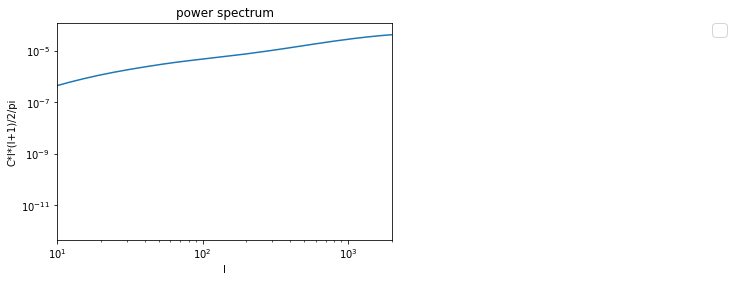

In [36]:
plt.plot(la,sa*la*(la+1)/2/math.pi)
ax = plt.gca()
ax.set_yscale('log')  # y軸をlogスケールで描く
ax.set_xscale('log')  # x軸をlogスケールで描く
plt.xlabel('l')
ax.set_xlim(10,2000)
plt.ylabel('C*l*(l+1)/2/pi')
plt.title("power spectrum")
plt.legend(bbox_to_anchor=(2, 1), loc='upper right', borderaxespad=0, fontsize=18)
plt.show()

In [37]:
pk2cl = hsc3x2pt.pk2cl_class(power_b1)
ombh2=0.046*0.7*0.7
omch2=0.233*0.7*0.7
Ode =0.721
ns = 0.97
cosmo_dict = dict(zip(['omega_b', 'omega_c', 'Omega_de', 'ln10p10As', 'n_s', 'w_de'], [ombh2, omch2, Ode, 3.094, ns, -1]))
pk2cl.set_cosmology_from_dict(cosmo_dict)
sigma8_temp = pk2cl.pk_class.get_sigma8()
ln10p10As = 3.094 + 2*np.log(0.82/sigma8_temp)
print(f'ln10p10As={ln10p10As}')

ln10p10As=3.114931326464135


In [17]:
sa[0]

6.643215917586193e-10

In [38]:
f = open("/Users/taniguchitakanori/Desktop/XMMpower/theorypower.dat", "w")
for i in range(len(la)):
    f.write(str(la[i]))
    f.write(" ")
    f.write(str(sa[i]))
    f.write('\n')